# Exploratory Data Analysis

The purpose of this notebook is to get a sense of what is in the donors choose data set

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score,f1_score
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
projects = pd.read_csv('Data/Projects.csv')
teachers = pd.read_csv('Data/Teachers.csv')
schools = pd.read_csv('Data/Schools.csv')
#donors=pd.read_csv('Data/Donors.csv')
#donations=pd.read_csv('Data/Donations.csv')

In [5]:
len(schools)

72993

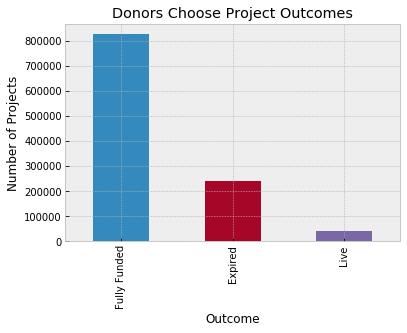

In [3]:
projects['Project Current Status'].value_counts().plot.bar()
plt.title("Donors Choose Project Outcomes")
plt.xlabel('Outcome')
plt.ylabel('Number of Projects');

In [4]:
data = projects['Project Current Status'].value_counts()
data

Fully Funded    826764
Expired         241402
Live             41851
Name: Project Current Status, dtype: int64

Drop duplicated projects

In [4]:
projects=projects.drop([1041063])

projects=projects.drop([983393])

In [7]:
projects.columns

Index(['Project ID', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type', 'Project Title',
       'Project Essay', 'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date'],
      dtype='object')

In [5]:
projects = projects[projects["Project Current Status"] != 'Live']
projects['Funded?']=np.where(projects['Project Current Status']=='Fully Funded', 0, 1)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


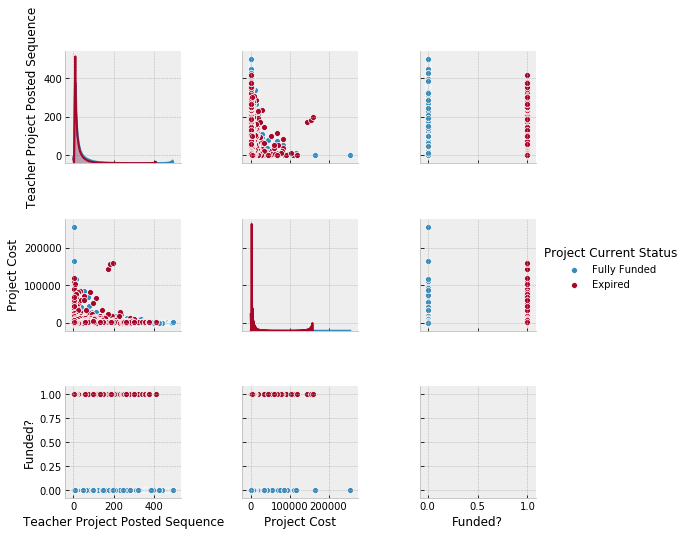

In [11]:
sns.pairplot(projects, hue='Project Current Status')

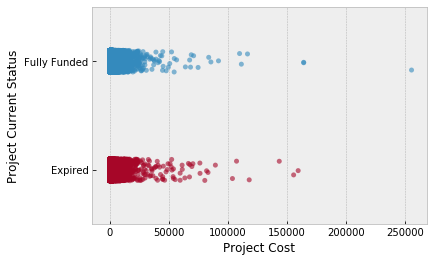

In [13]:
sns.stripplot(x='Project Cost',y='Project Current Status', jitter=True,data=projects,alpha=0.6);

Hmm, not much separation of the classes here, let's add some more features

In [15]:
main_df = pd.get_dummies(data=projects, columns=['Project Type', 
                                                 'Project Subject Category Tree',
                                                 'Project Grade Level Category',
                                                'Project Resource Category'])
main_df['Funded?']=np.where(projects['Project Current Status']=='Fully Funded', 0, 1)

In [18]:
main_df.drop(['Project Title',
             'Project Essay','Project Short Description','Project Need Statement',
              'Project Subject Subcategory Tree', 'Project Posted Date',
             'Project Expiration Date','Project Current Status','Project Fully Funded Date'],axis='columns',inplace=True)

In [7]:
projects_cat = projects[['Project Subject Category Tree','Project Current Status']]

In [8]:
projects_cat.head()

,Project Subject Category Tree,Project Current Status
0,Applied Learning,Fully Funded
1,"Applied Learning, Literacy & Language",Expired
2,Literacy & Language,Fully Funded
3,Literacy & Language,Fully Funded
4,Special Needs,Fully Funded


In [11]:
funded = projects_cat.loc[projects_cat['Project Current Status'] == 'Fully Funded']
expired = projects_cat.loc[projects_cat['Project Current Status'] == 'Expired']

<BarContainer object of 50 artists>

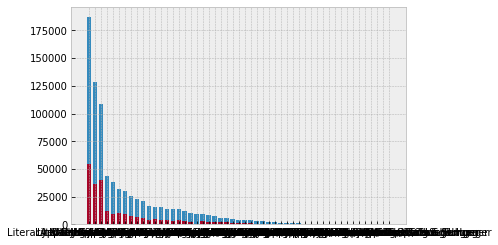

In [27]:
funds=funded['Project Subject Category Tree'].value_counts()
exps = expired['Project Subject Category Tree'].value_counts()


plt.bar(funds.index,funds.values)
plt.bar(exps.index,exps.values)

<BarContainer object of 17 artists>

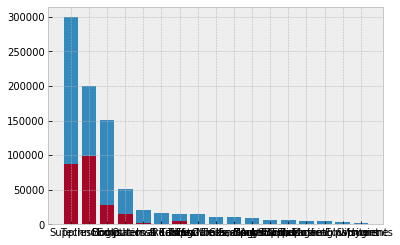

In [29]:
projects_res = projects[['Project Resource Category','Project Current Status']]
funded = projects_res.loc[projects_res['Project Current Status'] == 'Fully Funded']
expired = projects_res.loc[projects_res['Project Current Status'] == 'Expired']
funds=funded['Project Resource Category'].value_counts()
exps = expired['Project Resource Category'].value_counts()


plt.bar(funds.index,funds.values)
plt.bar(exps.index,exps.values)

In [32]:
funded['Project Resource Category'].value_counts()

Supplies                          299474
Technology                        200476
Books                             151168
Other                              51546
Computers & Tablets                21020
Educational Kits & Games           16918
Trips                              14879
Instructional Technology           14224
Flexible Seating                   10102
Reading Nooks, Desks & Storage      9932
Classroom Basics                    9105
Art Supplies                        6802
Lab Equipment                       5615
Sports & Exercise Equipment         5407
Food, Clothing & Hygiene            4799
Musical Instruments                 3245
Visitors                            2025
Name: Project Resource Category, dtype: int64

In [37]:
projects2 = projects.merge(schools,how='left',on='School ID')
projects2.columns

Index(['Project ID', 'School ID', 'Teacher ID',
       'Teacher Project Posted Sequence', 'Project Type', 'Project Title',
       'Project Essay', 'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'Funded?',
       'School Name', 'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District'],
      dtype='object')

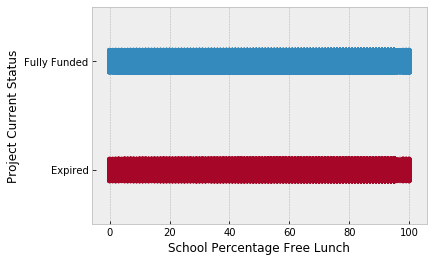

In [39]:
sns.stripplot(x='School Percentage Free Lunch',y='Project Current Status', jitter=True,data=projects2,alpha=0.6);

Hmm, hard to find clear relationships with the target. Maybe time to start modeling to see what happens